# Exploratory Data Analyst of New York Times News Dataset

As one of the most renowned online news platforms globally, The New York Times stands out for its exceptional ability to engage and connect with its readers. What sets this publication apart from others is its unique capacity to foster meaningful interactions with its audience. This dataset offers a wealth of information, presenting a valuable opportunity to analyze and gain insights from the extensive collection of news articles available through The New York Times.

### Columns:
- **abstract:** A brief summary or description of the article's content.
- **web_url:** The web address or URL of the article.
- **snippet:** A short excerpt or snippet from the article.
- **lead_paragraph:** The introductory paragraph of the article.
- **print_section:** The section in the print version of the newspaper where the article was published.
- **print_page:** The page number in the print version of the newspaper where the article was published.
- **source:** The source or provider of the article
- **multimedia:** Information about any multimedia content associated with the article, such as images or videos.
- **headline:** The title or heading of the article.
- **keywords:** Tags or keywords associated with the article, providing insights into its content.
- **pub_date:** The publication date of the article.
- **document_type:** The type or format of the document (e.g., article, blog post).
- **news_desk:** The department or desk responsible for the article.
- **section_name:** The section or category of the article.
- **byline:** The author or authors of the article.
- **type_of_material:** The type or nature of the article (e.g., news, opinion, review).
- **_id:** A unique identifier for the article.
- **word_count:** The number of words in the article.
- **uri:** The URI or unique resource identifier of the article.
- **subsection_name:** The subsection or subcategory of the article.

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [ ]:
nyt_df = pd.read_csv('../Data/Original/nyt-metadata.csv')

In [46]:
# expand the column width to see the full sentences
pd.set_option('display.max_colwidth', None)
nyt_df.head()

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri,subsection_name
0,Article on upcoming New York Giants-Dallas Cowboys game; photo (M),https://www.nytimes.com/2000/01/01/sports/pro-football-playoffs-or-no-dallas-provides-the-motivation.html,Article on upcoming New York Giants-Dallas Cowboys game; photo (M),"Waiting in the visiting locker room at Texas Stadium late tomorrow afternoon, the Giants will know whether the Green Bay Packers, who play earlier against Arizona, have won or are comfortably ahead.",D,2.0,The New York Times,[],"{'main': 'Playoffs or No, Dallas Provides The Motivation', 'kicker': 'PRO FOOTBALL', 'content_kicker': None, 'print_headline': 'PRO FOOTBALL; Playoffs or No, Dallas Provides The Motivation', 'name': None, 'seo': None, 'sub': None}","[{'name': 'organizations', 'value': 'New York Giants', 'rank': 1, 'major': 'N'}, {'name': 'organizations', 'value': 'Dallas Cowboys', 'rank': 2, 'major': 'N'}, {'name': 'subject', 'value': 'Football', 'rank': 3, 'major': 'N'}]",2000-01-01,article,Sports Desk,Sports,"{'original': 'By Bill Pennington', 'person': [{'firstname': 'Bill', 'middlename': None, 'lastname': 'Pennington', 'qualifier': None, 'title': None, 'role': 'reported', 'organization': '', 'rank': 1}], 'organization': None}",News,nyt://article/01111a48-3502-5021-8096-bc9293797d54,819.0,nyt://article/01111a48-3502-5021-8096-bc9293797d54,NaN
1,"Jeanne C Pond letter expresses hope that spiritual development, artistic knowledge and skills and self-esteem flourish in new century; drawing",https://www.nytimes.com/2000/01/01/opinion/l-on-this-first-day-a-fanfare-for-the-new-era-knowing-the-world-165590.html,"Jeanne C Pond letter expresses hope that spiritual development, artistic knowledge and skills and self-esteem flourish in new century; drawing",To the Editor:,A,30.0,The New York Times,[],"{'main': 'On This First Day, a Fanfare for the New Era; Knowing the World', 'kicker': None, 'content_kicker': None, 'print_headline': 'On This First Day, a Fanfare for the New Era; Knowing the World', 'name': None, 'seo': None, 'sub': None}","[{'name': 'persons', 'value': 'Pond, Jeanne C', 'rank': 1, 'major': 'N'}, {'name': 'subject', 'value': 'TWO THOUSAND (YEAR)', 'rank': 2, 'major': 'N'}]",2000-01-01,article,Editorial Desk,Opinion,"{'original': '', 'person': [], 'organization': None}",Letter,nyt://article/02328edc-dad1-5eb0-900e-917162e46dcd,122.0,nyt://article/02328edc-dad1-5eb0-900e-917162e46dcd,NaN
2,"Many experts on Y2K computer problem report that Internet performed impressively through rollover from 1999 to 2000 even if it did sag at times in isolated sites as users turned to e-mail messages, Web sites, newsgroups and electronic chat rooms to track arrival of Year 2000 in more and more time zones (M)",https://www.nytimes.com/2000/01/01/us/1-1-00-technology-2000-momentous-relief-internet-s-cheering-squad-nervously.html,"Many experts on Y2K computer problem report that Internet performed impressively through rollover from 1999 to 2000 even if it did sag at times in isolated sites as users turned to e-mail messages, Web sites, newsgroups and electronic chat rooms t...","As the world slid nervously yesterday through the shadow of its first global technology challenge, many year 2000 experts took special comfort in the relatively stable behavior of one of their principal tools in dealing with the problem: the not-always-reliable Internet.",A,10.0,The New York Times,[],"{'main': ""Internet's Cheering Squad Nervously Watches Clock"", 'kicker': '1/1/00: TECHNOLOGY AND 2000 -- MOMENTOUS RELIEF', 'content_kicker': None, 'print_headline': ""1/1/00: TECHNOLOGY AND 2000 -- MOMENTOUS RELIEF; Internet's Cheering Squad Nervously Watches Clock"", 'name': None, 'seo': None, 'sub': None}","[{'name': 'subject', 'value': 'Electronic Mail', 'rank': 1, 'major': 'N'}, {'name': 'subject', 'value': 'COMPUT

### Structure of Dataset

In [6]:
#Size of Dataset
nyt_df.shape

(2191867, 20)

In [9]:
#Type of variables
nyt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191867 entries, 0 to 2191866
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   abstract          object 
 1   web_url           object 
 2   snippet           object 
 3   lead_paragraph    object 
 4   print_section     object 
 5   print_page        object 
 6   source            object 
 7   multimedia        object 
 8   headline          object 
 9   keywords          object 
 10  pub_date          object 
 11  document_type     object 
 12  news_desk         object 
 13  section_name      object 
 14  byline            object 
 15  type_of_material  object 
 16  _id               object 
 17  word_count        float64
 18  uri               object 
 19  subsection_name   object 
dtypes: float64(1), object(19)
memory usage: 334.5+ MB


In [25]:
#Modify date to Analysis
nyt_df['pub_date'] = pd.to_datetime(nyt_df['pub_date'], errors='coerce')
nyt_df['pub_date'] = nyt_df['pub_date'].dt.date
nyt_df['pub_date'].head(2)

0    2000-01-01
1    2000-01-01
Name: pub_date, dtype: object

## Summarize the Data

In [26]:
#Get missing values 
missing_per_column = nyt_df.isnull().sum()
print(missing_per_column)

abstract              31917
web_url                   1
snippet              196167
lead_paragraph        41989
print_section        746774
print_page           748022
source                    1
multimedia                1
headline                  1
keywords                  1
pub_date                  2
document_type             1
news_desk            301299
section_name           2010
byline                    1
type_of_material      85290
_id                       1
word_count                2
uri                       2
subsection_name     1603587
dtype: int64


#### Dates summaries

In [29]:
#Oldest and Newest days
nyt_df = nyt_df.dropna(subset=['pub_date'])
print("Oldst Date: ", nyt_df['pub_date'].min())
print("Recent Date: ", nyt_df['pub_date'].max())

Oldst Date:  2000-01-01
Recent Date:  2025-05-01


In [30]:
#News by day of first days
counts = nyt_df['pub_date'].value_counts().sort_index()
print(counts.head(20))

pub_date
2000-01-01    244
2000-01-02    477
2000-01-03    184
2000-01-04    258
2000-01-05    239
2000-01-06    253
2000-01-07    252
2000-01-08    195
2000-01-09    550
2000-01-10    175
2000-01-11    272
2000-01-12    268
2000-01-13    303
2000-01-14    211
2000-01-15    178
2000-01-16    536
2000-01-17    161
2000-01-18    221
2000-01-19    229
2000-01-20    276
Name: count, dtype: int64


In [31]:
#News by day of last days
print(counts.tail(20))

pub_date
2024-12-17    154
2024-12-18    148
2024-12-19    167
2024-12-20    195
2024-12-21     84
2024-12-22     57
2024-12-23    115
2024-12-24     96
2024-12-25     70
2024-12-26     95
2024-12-27    102
2024-12-28     60
2024-12-29     74
2024-12-30    108
2024-12-31     68
2025-01-01      2
2025-02-01     24
2025-03-01      7
2025-04-01    164
2025-05-01    186
Name: count, dtype: int64


#### Type of material summaries

In [32]:
#All variables from type_of_material
nyt_df['type_of_material'].unique()

array(['News', 'Letter', 'Summary', 'Paid Death Notice', 'Chronology',
       'Review', 'Op-Ed', 'Obituary; Biography', 'Correction', 'List',
       'Interview', 'Biography', 'An Analysis; News Analysis',
       'Editorial', 'Statistics', "Editors' Note", 'Schedule', 'Series',
       'Question', 'Special Report', 'Text', 'Op-Ed; Caption',
       'Transcript', 'Biography; Obituary', 'Interview; Text',
       'Chronology; Special Report', 'Series; Interview', 'An Appraisal',
       'Series; Text', 'Caption; Op-Ed', 'Special Report; Chronology',
       'Text; Interview', 'An Analysis', nan, 'Series; Chronology',
       'An Analysis; Military Analysis', 'Chronology; Series',
       'Series; Biography', 'News Analysis', 'QandA', 'Results Listing',
       'Profile', 'Slideshow', 'Obituary',
       'An Analysis; Economic Analysis', 'Sidebar',
       'Chronology; An Analysis; News Analysis', 'Interview; Series',
       'Video', 'Quote', 'Biography; Series', 'Editorial; Series',
       'Series;

In [41]:
#Count of news by Type of material
counts_type_material = nyt_df['type_of_material'].value_counts().sort_index()
print(counts_type_material.head(30))

type_of_material
Addendum                                      3
An Analysis                                  87
An Analysis; Economic Analysis               19
An Analysis; Military Analysis               68
An Analysis; News Analysis                 1949
An Analysis; News Analysis; Chronology        1
An Appraisal                                235
Audio Podcast                                 9
Biography                                  2786
Biography; Chronology                         1
Biography; Obituary                          17
Biography; Series                             1
Brief                                     21527
Caption                                      85
Caption; Editorial                            1
Caption; Op-Ed                               21
Chronology                                  246
Chronology; An Analysis; News Analysis        2
Chronology; Series                            1
Chronology; Special Report                    2
Correction             

In [38]:
#Most common type of material
most_common = counts_type_material.idxmax()
max_count = counts_type_material.max()

print(f"Most common type_of_material: {most_common} ({max_count} times)")

Most common type_of_material: News (1417125 times)


In [40]:
#Less common type of material
less_common = counts_type_material.idxmin()
min_count = counts_type_material.min()

print(f"Most common type_of_material: {less_common} ({min_count} times)")

Most common type_of_material: An Analysis; News Analysis; Chronology (1 times)


#### Section Name summaries

In [42]:
#All variables of section name
nyt_df['section_name'].unique()

array(['Sports', 'Opinion', 'U.S.', 'Archives', 'New York',
       'Business Day', 'Technology', 'Arts', 'Books', 'World', 'Theater',
       'Education', 'Movies', 'Travel', 'Style', 'Real Estate',
       'Magazine', 'Week in Review', 'Automobiles', 'Fashion & Style',
       'Health', 'Science', 'Job Market', 'Food', 'Home & Garden',
       'T Magazine', 'Giving', 'Obituaries', 'The Learning Network',
       'membercenter', nan, 'Climate', 'Your Money', 'Corrections',
       'Homepage', 'readersopinions', 'Crosswords & Games',
       'Editors Picks', 'Great Homes & Destinations', 'nationchallenged',
       'Multimedia/Photos', "Critic's Choice", 'College', 'timestalks',
       'Washington', 'none', 'timesselect', 'Blogs', 'Times Topics',
       'Well', 'nytfrontpage', 'UrbanEye', 'xword', 'Sunday Review',
       'Global Home', 'Public Editor', 'Booming', 'The Upshot', 'Feeds',
       'International Home', 'Times Insider', 'NYT Now', 'Admin',
       'Universal', 'Topics', 'Today’s Paper

In [92]:
#Count of news by Section Name
counts_section_name = nyt_df['section_name'].value_counts().sort_index()
print(counts_section_name.head(30))

section_name
Admin                            295
Archives                       91013
Arts                          162424
At Home                          491
Automobiles                    13004
Blogs                          46075
Book Review                        1
Books                          54576
Booming                          609
Briefing                        8294
Burst                             62
Business Day                  273577
Climate                         2759
College                            3
Corrections                    12500
Critic's Choice                   68
Crosswords & Games             10919
Editors Picks                     15
Education                      17470
Fashion & Style                44440
Feeds                              1
Food                           28875
Giving                           409
Global Home                        3
Great Homes & Destinations      2632
Guide                              3
Guides                   

In [93]:
#Most common section name
most_common = counts_section_name.idxmax()
max_count = counts_section_name.max()

print(f"Most common section name: {most_common} ({max_count} times)")

Most common section name: Business Day (273577 times)


In [94]:
#Less common type of material
less_common = counts_section_namel.idxmin()
min_count = counts_section_namel.min()

print(f"Most common section name: {less_common} ({min_count} times)")

Most common section name: Book Review (1 times)


## Data Visualization

#### News by year visualization

In [91]:
nyt_df['pub_date'] = pd.to_datetime(nyt_df['pub_date'])
nyt_df['pub_year_month'] = nyt_df['pub_date'].dt.to_period('M')
nyt_df['pub_year_month'].head()

0    2000-01
1    2000-01
2    2000-01
3    2000-01
4    2000-01
Name: pub_year_month, dtype: period[M]

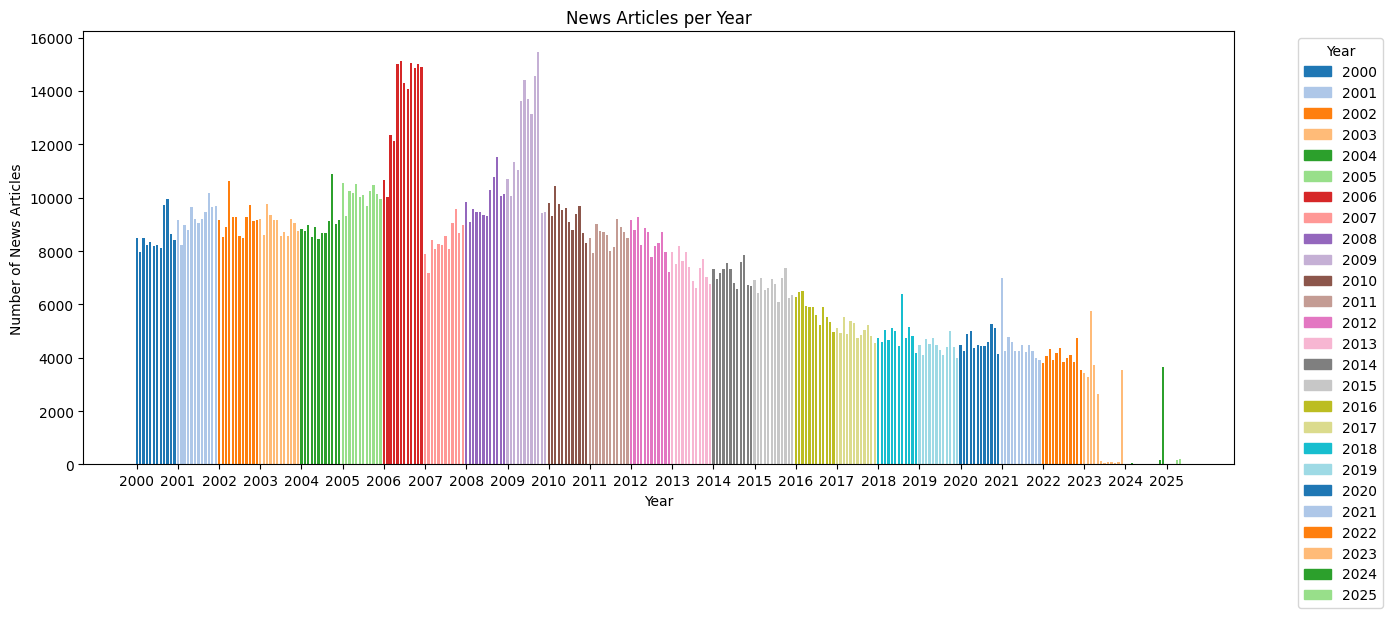

In [89]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd

# Convert PeriodIndex to Timestamp if needed
counts_news_by_month = nyt_df['pub_year_month'].value_counts().sort_index()
counts_news_by_month.index = counts_news_by_month.index.to_timestamp()

# Extract year from index
years = counts_news_by_month.index.year
unique_years = sorted(set(years))

# Assign colors per year
colors = {year: plt.cm.tab20(i % 20) for i, year in enumerate(unique_years)}
bar_colors = [colors[year] for year in years]

# Plot the bar chart
plt.figure(figsize=(14, 6))
plt.bar(counts_news_by_month.index, counts_news_by_month.values, color=bar_colors, width=20)

plt.xlabel('Year')
plt.ylabel('Number of News Articles')
plt.title('News Articles per Year')

# Find first date per year for x-axis ticks
ticks = [counts_news_by_month.index[years == year][0] for year in unique_years]
tick_labels = [str(year) for year in unique_years]

plt.xticks(ticks, tick_labels, rotation=0)

# Add legend
legend_handles = [Patch(color=colors[year], label=str(year)) for year in unique_years]
plt.legend(handles=legend_handles, title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### News by Section Name

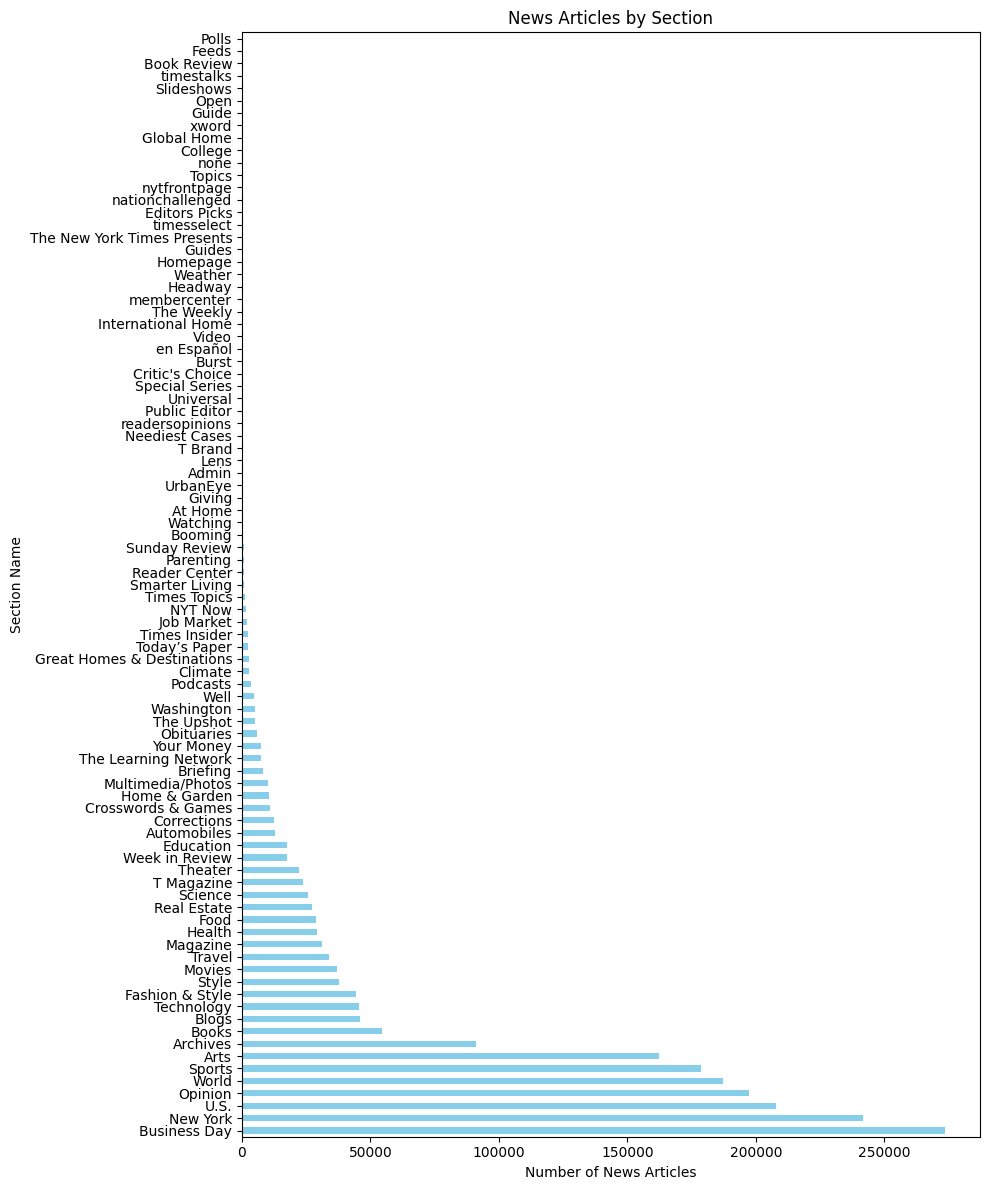

In [96]:
section_counts = counts_section_name.sort_values(ascending=False) 
 
# Plot 
plt.figure(figsize=(10, 12))  # Adjust height for readability 
section_counts.plot(kind='barh', color='skyblue') 
plt.xlabel('Number of News Articles') 
plt.ylabel('Section Name')
plt.title('News Articles by Section')
plt.tight_layout()
plt.show()

#### News by Type of material

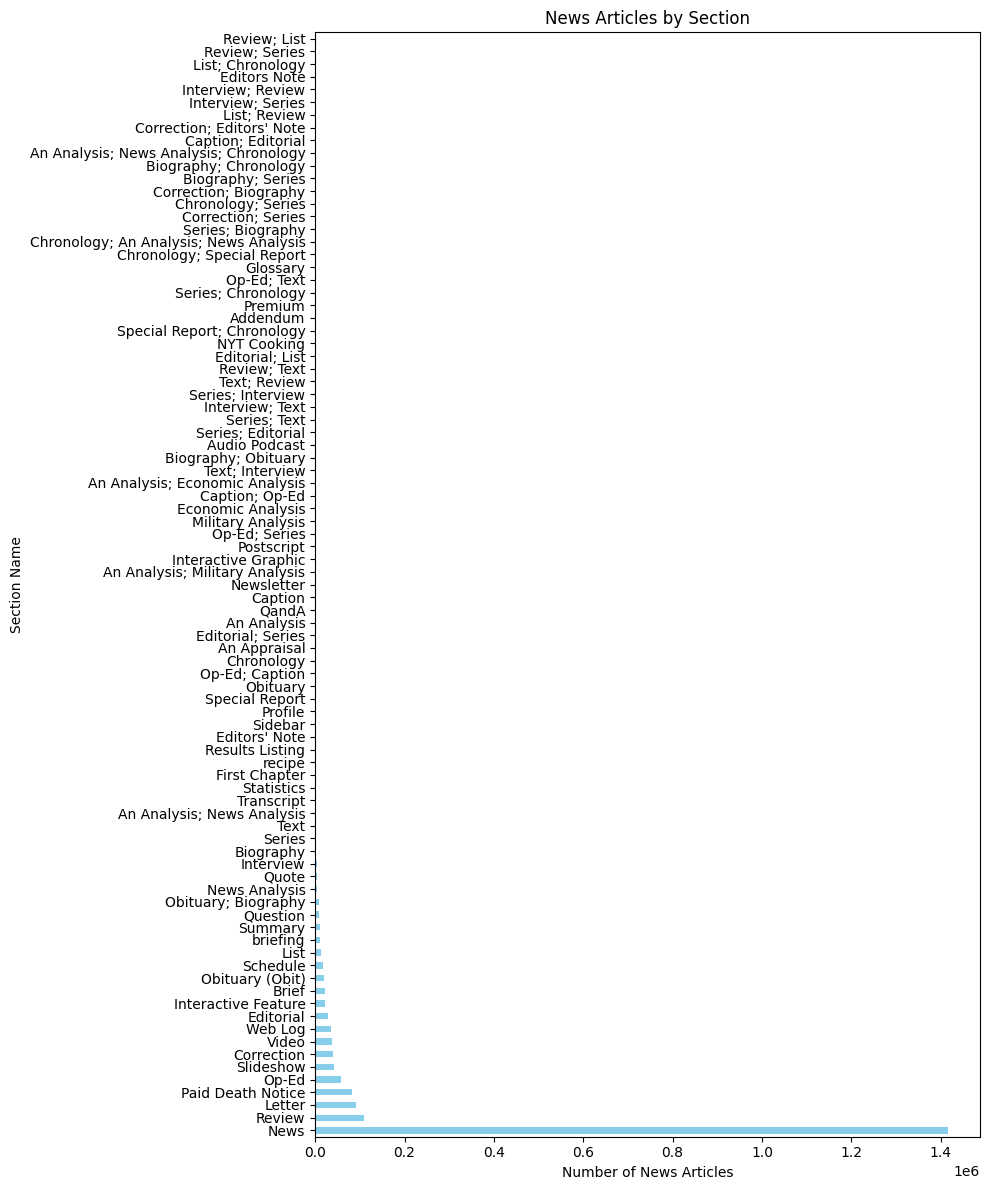

In [98]:
type_material = counts_type_material.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 12))  # Adjust height for readability
type_material.plot(kind='barh', color='skyblue')
plt.xlabel('Number of News Articles')
plt.ylabel('Section Name')
plt.title('News Articles by Section')
plt.tight_layout()
plt.show()